Target:
* Reduce the number of parameters while trying to maintain the accuracy.
* I removed an extra layer at the end by making one of the convolutions from 16 to 10 channels and getting rid of the 1x1 convolution block.

Result:
* The parameter count has gone from ~9000 to ~7200 because of the
removed layer
* Max Train accuracy (in 15 epochs): 99.25%.
* Max test accuracy (in 15 epochs): 99.2%

Analysis:
*  Compared the previous model, even though a layer of convolution was removed, the fall in accuracy was not drastic. Now the parameters are within the target criteria.
* There is still some overfitting occuring after epoch 15. Need to add dropout to improve it.

In [1]:
!git clone "https://github.com/jyanivaddi/ERA_V1.git"
!git pull

Cloning into 'ERA_V1'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (195/195), done.
remote: Compressing objects: 100% (155/155), done.
remote: Total 195 (delta 87), reused 117 (delta 35), pack-reused 0
Receiving objects: 100% (195/195), 3.49 MiB | 14.03 MiB/s, done.
Resolving deltas: 100% (87/87), done.
fatal: not a git repository (or any of the parent directories): .git


Add all the imports

In [2]:
from __future__ import print_function
import sys
sys.path.append("ERA_V1/session_7")
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from s7_utils import load_mnist_data, preview_batch_images, plot_statistics
from s7_model import Model_4_Net, model_summary, model_train, model_test

Allocate GPU

In [3]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
mnist_model = Model_4_Net().to(device)
model_summary(mnist_model, input_size=(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
       BatchNorm2d-2           [-1, 10, 26, 26]              20
              ReLU-3           [-1, 10, 26, 26]               0
            Conv2d-4           [-1, 10, 24, 24]             900
       BatchNorm2d-5           [-1, 10, 24, 24]              20
              ReLU-6           [-1, 10, 24, 24]               0
            Conv2d-7           [-1, 10, 22, 22]             900
       BatchNorm2d-8           [-1, 10, 22, 22]              20
              ReLU-9           [-1, 10, 22, 22]               0
        MaxPool2d-10           [-1, 10, 11, 11]               0
           Conv2d-11             [-1, 16, 9, 9]           1,440
      BatchNorm2d-12             [-1, 16, 9, 9]              32
             ReLU-13             [-1, 16, 9, 9]               0
           Conv2d-14             [-1, 1

Define Transforms

In [4]:
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))
])
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))
])

Download Data

In [5]:
train_data, test_data = load_mnist_data(train_transforms, test_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 152082520.94it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 24481748.95it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 30852890.59it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 11380244.19it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



Define train and test loaders

In [6]:
torch.manual_seed(1)
batch_size = 128
kwargs = {'num_workers': 2, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle = True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle = True, **kwargs)

Preview data

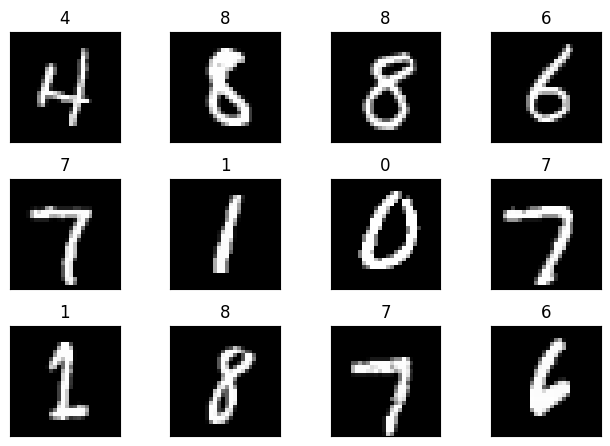

In [7]:
preview_batch_images(train_loader)

In [8]:
model = Model_4_Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
train_losses = []
test_losses = []
train_acc = []
test_acc = []
for epoch in range(1,20):
    print(f"epoch: {epoch}")
    model_train(model, device, train_loader, optimizer, train_acc, train_losses)
    model_test(model, device, test_loader, test_acc, test_losses)


epoch: 1


loss=0.23089861869812012 batch_id=468 Accuracy = 92.43: 100%|██████████| 469/469 [00:18<00:00, 25.28it/s]



Test set: Average loss: 0.1314, Accuracy: 9776/10000 (97.76%)

epoch: 2


loss=0.1873089224100113 batch_id=468 Accuracy = 97.91: 100%|██████████| 469/469 [00:17<00:00, 27.29it/s]



Test set: Average loss: 0.0769, Accuracy: 9857/10000 (98.57%)

epoch: 3


loss=0.041425589472055435 batch_id=468 Accuracy = 98.40: 100%|██████████| 469/469 [00:16<00:00, 28.09it/s]



Test set: Average loss: 0.0591, Accuracy: 9882/10000 (98.82%)

epoch: 4


loss=0.05860993266105652 batch_id=468 Accuracy = 98.65: 100%|██████████| 469/469 [00:16<00:00, 27.91it/s]



Test set: Average loss: 0.0532, Accuracy: 9876/10000 (98.76%)

epoch: 5


loss=0.055681291967630386 batch_id=468 Accuracy = 98.75: 100%|██████████| 469/469 [00:16<00:00, 28.09it/s]



Test set: Average loss: 0.0502, Accuracy: 9867/10000 (98.67%)

epoch: 6


loss=0.04691414162516594 batch_id=468 Accuracy = 98.89: 100%|██████████| 469/469 [00:16<00:00, 27.97it/s]



Test set: Average loss: 0.0415, Accuracy: 9909/10000 (99.09%)

epoch: 7


loss=0.04326460137963295 batch_id=468 Accuracy = 99.01: 100%|██████████| 469/469 [00:16<00:00, 27.98it/s]



Test set: Average loss: 0.0357, Accuracy: 9912/10000 (99.12%)

epoch: 8


loss=0.04341192916035652 batch_id=468 Accuracy = 98.99: 100%|██████████| 469/469 [00:17<00:00, 27.25it/s]



Test set: Average loss: 0.0354, Accuracy: 9910/10000 (99.10%)

epoch: 9


loss=0.08478495478630066 batch_id=468 Accuracy = 99.06: 100%|██████████| 469/469 [00:16<00:00, 27.86it/s]



Test set: Average loss: 0.0418, Accuracy: 9912/10000 (99.12%)

epoch: 10


loss=0.038232848048210144 batch_id=468 Accuracy = 99.12: 100%|██████████| 469/469 [00:17<00:00, 26.77it/s]



Test set: Average loss: 0.0412, Accuracy: 9909/10000 (99.09%)

epoch: 11


loss=0.06705091148614883 batch_id=468 Accuracy = 99.18: 100%|██████████| 469/469 [00:17<00:00, 27.58it/s]



Test set: Average loss: 0.0317, Accuracy: 9931/10000 (99.31%)

epoch: 12


loss=0.03808346018195152 batch_id=468 Accuracy = 99.25: 100%|██████████| 469/469 [00:18<00:00, 26.04it/s]



Test set: Average loss: 0.0307, Accuracy: 9925/10000 (99.25%)

epoch: 13


loss=0.04944939538836479 batch_id=468 Accuracy = 99.28: 100%|██████████| 469/469 [00:17<00:00, 27.22it/s]



Test set: Average loss: 0.0347, Accuracy: 9902/10000 (99.02%)

epoch: 14


loss=0.052096616476774216 batch_id=468 Accuracy = 99.30: 100%|██████████| 469/469 [00:18<00:00, 25.49it/s]



Test set: Average loss: 0.0284, Accuracy: 9926/10000 (99.26%)

epoch: 15


loss=0.049710240215063095 batch_id=468 Accuracy = 99.31: 100%|██████████| 469/469 [00:18<00:00, 25.61it/s]



Test set: Average loss: 0.0306, Accuracy: 9918/10000 (99.18%)

epoch: 16


loss=0.04303237795829773 batch_id=468 Accuracy = 99.32: 100%|██████████| 469/469 [00:18<00:00, 25.53it/s]



Test set: Average loss: 0.0284, Accuracy: 9931/10000 (99.31%)

epoch: 17


loss=0.00406728545203805 batch_id=468 Accuracy = 99.37: 100%|██████████| 469/469 [00:17<00:00, 27.06it/s]



Test set: Average loss: 0.0297, Accuracy: 9919/10000 (99.19%)

epoch: 18


loss=0.03395317122340202 batch_id=468 Accuracy = 99.43: 100%|██████████| 469/469 [00:17<00:00, 26.38it/s]



Test set: Average loss: 0.0255, Accuracy: 9930/10000 (99.30%)

epoch: 19


loss=0.06203719601035118 batch_id=468 Accuracy = 99.41: 100%|██████████| 469/469 [00:17<00:00, 27.09it/s]



Test set: Average loss: 0.0256, Accuracy: 9932/10000 (99.32%)



Plot Statistics

In [ ]:
plot_statistics(train_losses, train_acc, test_losses, test_acc)